In [ ]:
import time
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import os
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import zipfile
import math
from torch import nn
import torch.optim as optim
from torchvision import datasets, transforms
import shutil

In [ ]:
device = torch.device ("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Capstone_2/Copy of PAD_Classified.zip" -d "/content/skin-images"

Archive:  /content/drive/MyDrive/Capstone_2/Copy of PAD_Classified.zip
   creating: /content/skin-images/PAD_Classified/ACK/
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1006_53_385.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1006_53_716.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1013_82_876.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1014_85_22.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1014_86_861.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1017_97_577.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1018_107_68.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1019_110_194.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1020_111_593.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1021_112_40.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1022_114_756.png  
  inflating: /content/skin-images/PAD_Classified

In [ ]:
# path1="/content/skin-images/PAD_Classified/Seborrheic_Keratosis/SEK"
# path2="/content/skin-images/PAD_Classified/Squamous_Cell_Carcinoma/SCC"
path3="/content/skin-images/PAD_Classified/ACK"
path4="/content/skin-images/PAD_Classified/BCC"
path5="/content/skin-images/PAD_Classified/MEL"
path6="/content/skin-images/PAD_Classified/NEV"
# shutil.move (path1, "/content/dataset/SEK" )
# shutil.move (path2, "/content/dataset/SCC" )
shutil.move (path3, "/content/dataset/ACK" )
shutil.move (path4, "/content/dataset/BCC" )
shutil.move (path5, "/content/dataset/MEL" )
shutil.move (path6, "/content/dataset/NEV" )

'/content/dataset/NEV'

In [ ]:
!unzip "/content/drive/MyDrive/Capstone/Copy of actinic_keratosis.zip" -d "/content/skin-images"
!unzip "/content/drive/MyDrive/Capstone/Copy of basal_cell_carcinoma.zip" -d "/content/skin-images"
!unzip "/content/drive/MyDrive/Capstone/Copy of melanocytic nevus.zip" -d "/content/skin-images"
!unzip "/content/drive/MyDrive/Capstone/Copy of melanoma.zip" -d "/content/skin-images"

Streaming output truncated to the last 5000 lines.
  inflating: /content/skin-images/akiec_aug/aug_55_7100888.png  
  inflating: /content/skin-images/akiec_aug/aug_56_2378708.png  
  inflating: /content/skin-images/akiec_aug/aug_56_7226693.png  
  inflating: /content/skin-images/akiec_aug/aug_57_1637390.png  
  inflating: /content/skin-images/akiec_aug/aug_57_4630317.png  
  inflating: /content/skin-images/akiec_aug/aug_57_8988592.png  
  inflating: /content/skin-images/akiec_aug/aug_58_1058312.png  
  inflating: /content/skin-images/akiec_aug/aug_58_4176413.png  
  inflating: /content/skin-images/akiec_aug/aug_58_4529837.png  
  inflating: /content/skin-images/akiec_aug/aug_58_7841721.png  
  inflating: /content/skin-images/akiec_aug/aug_59_210338.png  
  inflating: /content/skin-images/akiec_aug/aug_59_4382254.png  
  inflating: /content/skin-images/akiec_aug/aug_59_5157527.png  
  inflating: /content/skin-images/akiec_aug/aug_6_1180490.png  
  inflating: /content/skin-images/akiec_a

In [ ]:
shutil.move ("/content/skin-images/akiec_aug", "/content/dataset/ACK" )
shutil.move ("/content/skin-images/bcc_aug", "/content/dataset/BCC" )
shutil.move ("/content/skin-images/mel_aug", "/content/dataset/MEL" )
shutil.move ("/content/skin-images/nv_aug", "/content/dataset/NEV" )

'/content/dataset/NEV/nv_aug'

In [ ]:
#HYPERPARAMETERS

batch_size = 32
num_epochs = 10

In [ ]:
transformer=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
])

In [ ]:
dataset_path = '/content/dataset'

def load_dataset():
    train_dataset_manual = torchvision.datasets.ImageFolder(dataset_path, transform=transformer)
    train_loader_manual = torch.utils.data.DataLoader(train_dataset_manual)
    return train_loader_manual


full_dataset = load_dataset()


train_size = int(0.6 * len(full_dataset))
test_size = int (0.2 * len(full_dataset))
valid_size = len(full_dataset) - train_size - test_size


train_dataset, test_dataset, valid_dataset = torch.utils.data.random_split(full_dataset.dataset, [train_size, test_size, valid_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=0, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=0, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, num_workers=0, shuffle=True)

print('Full Dataset - ' + str(len(full_dataset)) + ' images.')
print('Train Set- ' + str(train_size) + ' images in ' + str(len(train_loader)) +' batches')
print('Testing Set - ' + str(test_size) + ' images in ' + str(len(test_loader)) + ' batches' )
print('Validation Set - ' + str(valid_size) + ' images in ' + str(len(valid_loader)) + ' batches')

train_count = train_size
test_count = test_size
valid_count = valid_size

Full Dataset - 7871 images.
Train Set- 4722 images in 148 batches
Testing Set - 1574 images in 50 batches
Validation Set - 1575 images in 50 batches


In [ ]:

# Define the augmentation pipeline
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.ToTensor(),
])

# Load the dataset
train_dataset = datasets.ImageFolder(
    root=dataset_path,
    transform=train_transforms
)

# Print the number of samples in the augmented dataset
print(f"Number of samples in the augmented dataset: {len(train_dataset)}")

Number of samples in the augmented dataset: 7871


In [ ]:
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([32, 3, 224, 224])
Image label dimensions: torch.Size([32])


In [ ]:
root = pathlib.Path (dataset_path)
classes = sorted ([j.name.split('/')[-1] for j in root.iterdir()])
print (classes)
print(len(classes))

['ACK', 'BCC', 'MEL', 'NEV']
4


In [ ]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached 

In [ ]:
device = torch.device ("cuda" if torch.cuda.is_available() else "cpu")
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b4').to(device)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b4-6ed6700e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b4-6ed6700e.pth
100%|██████████| 74.4M/74.4M [00:00<00:00, 364MB/s]


Loaded pretrained weights for efficientnet-b4


In [ ]:
model._fc = nn.Linear(in_features=model._fc.in_features, out_features=4, bias=True)

In [ ]:
checkpoint = torch.load('/content/drive/MyDrive/New_Dataset/Copy of EfficientNetB4', map_location=torch.device('cpu'))
# Load the state dictionaries
model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Load other training parameters
epoch = checkpoint['epoch']
val_accuracy = checkpoint['val_accuracy']
val_loss = checkpoint['val_loss']
train_accuracy = checkpoint['train_accuracy']
train_loss = checkpoint['train_loss']

print(val_accuracy)
print(val_loss)
print(train_accuracy)
print(train_loss)

0.8443456162642948
0.5271637491881848
0.9587039390088945
0.11072602006292122


In [ ]:
from torchsummary import summary
model=model.to(device)
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1          [-1, 3, 225, 225]               0
Conv2dStaticSamePadding-2         [-1, 48, 112, 112]           1,296
       BatchNorm2d-3         [-1, 48, 112, 112]              96
MemoryEfficientSwish-4         [-1, 48, 112, 112]               0
         ZeroPad2d-5         [-1, 48, 114, 114]               0
Conv2dStaticSamePadding-6         [-1, 48, 112, 112]             432
       BatchNorm2d-7         [-1, 48, 112, 112]              96
MemoryEfficientSwish-8         [-1, 48, 112, 112]               0
          Identity-9             [-1, 48, 1, 1]               0
Conv2dStaticSamePadding-10             [-1, 12, 1, 1]             588
MemoryEfficientSwish-11             [-1, 12, 1, 1]               0
         Identity-12             [-1, 12, 1, 1]               0
Conv2dStaticSamePadding-13             [-1, 48, 1, 1]             624
         I

In [ ]:
model=model.to(device)

In [ ]:
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()

In [ ]:
 epoch_list = []
 train_accuracy_list = []
 val_loss_list = []
 val_accuracy_list = []
 train_loss_list = []

In [ ]:
 for epoch in range(10):
    train_loss = 0.0
    train_correct = 0.0
    train_total = 0.0
    val_loss = 0.0
    val_correct = 0.0
    val_total = 0.0

    # Train the model
    model.train()
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels
        inputs, labels = data
        inputs, labels=inputs.to(device),labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Compute training loss
        train_loss += loss.item()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels=images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Compute validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Compute validation
            val_loss += loss.item()

    # Compute average training loss and accuracy
    train_loss /= len(train_loader)
    train_accuracy = train_correct / train_total
    epoch_list.append(epoch)
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    # Compute average validation loss and accuracy
    val_loss /= len(test_loader)
    val_accuracy = val_correct / val_total
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    # Print the loss and accuracy values for each epoch
    print('Epoch [%d], Train Loss: %.4f, Train Acc: %.4f, Val Loss: %.4f, Val Acc: %.4f'
                    % (epoch + 1, train_loss, train_accuracy, val_loss, val_accuracy))

Epoch [1], Train Loss: 0.6847, Train Acc: 0.7327, Val Loss: 2.0586, Val Acc: 0.3767
Epoch [2], Train Loss: 0.4335, Train Acc: 0.8407, Val Loss: 1.3024, Val Acc: 0.6207
Epoch [3], Train Loss: 0.3005, Train Acc: 0.8886, Val Loss: 0.7170, Val Acc: 0.7732
Epoch [4], Train Loss: 0.2639, Train Acc: 0.9051, Val Loss: 0.7247, Val Acc: 0.7840
Epoch [5], Train Loss: 0.1865, Train Acc: 0.9324, Val Loss: 0.6102, Val Acc: 0.7999
Epoch [6], Train Loss: 0.1593, Train Acc: 0.9452, Val Loss: 0.9563, Val Acc: 0.7039
Epoch [7], Train Loss: 0.1624, Train Acc: 0.9452, Val Loss: 0.4902, Val Acc: 0.8348
Epoch [8], Train Loss: 0.1248, Train Acc: 0.9570, Val Loss: 0.6743, Val Acc: 0.8107
Epoch [9], Train Loss: 0.1288, Train Acc: 0.9574, Val Loss: 0.8069, Val Acc: 0.8088
Epoch [10], Train Loss: 0.1373, Train Acc: 0.9545, Val Loss: 0.6449, Val Acc: 0.8005


In [ ]:
 for epoch in range(10,15):
    train_loss = 0.0
    train_correct = 0.0
    train_total = 0.0
    val_loss = 0.0
    val_correct = 0.0
    val_total = 0.0

    # Train the model
    model.train()
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels
        inputs, labels = data
        inputs, labels=inputs.to(device),labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Compute training loss
        train_loss += loss.item()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels=images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Compute validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Compute validation
            val_loss += loss.item()

    # Compute average training loss and accuracy
    train_loss /= len(train_loader)
    train_accuracy = train_correct / train_total
    epoch_list.append(epoch)
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    # Compute average validation loss and accuracy
    val_loss /= len(test_loader)
    val_accuracy = val_correct / val_total
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    # Print the loss and accuracy values for each epoch
    print('Epoch [%d], Train Loss: %.4f, Train Acc: %.4f, Val Loss: %.4f, Val Acc: %.4f'
                    % (epoch + 1, train_loss, train_accuracy, val_loss, val_accuracy))

Epoch [11], Train Loss: 0.1060, Train Acc: 0.9619, Val Loss: 0.7563, Val Acc: 0.7764
Epoch [12], Train Loss: 0.0938, Train Acc: 0.9697, Val Loss: 0.5025, Val Acc: 0.8189
Epoch [13], Train Loss: 0.0973, Train Acc: 0.9678, Val Loss: 0.7038, Val Acc: 0.7694
Epoch [14], Train Loss: 0.0901, Train Acc: 0.9720, Val Loss: 0.5533, Val Acc: 0.8361
Epoch [15], Train Loss: 0.0847, Train Acc: 0.9695, Val Loss: 0.7570, Val Acc: 0.7865


In [ ]:
 for epoch in range(15,20):
    train_loss = 0.0
    train_correct = 0.0
    train_total = 0.0
    val_loss = 0.0
    val_correct = 0.0
    val_total = 0.0

    # Train the model
    model.train()
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels
        inputs, labels = data
        inputs, labels=inputs.to(device),labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Compute training loss
        train_loss += loss.item()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels=images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Compute validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Compute validation
            val_loss += loss.item()

    # Compute average training loss and accuracy
    train_loss /= len(train_loader)
    train_accuracy = train_correct / train_total
    epoch_list.append(epoch)
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    # Compute average validation loss and accuracy
    val_loss /= len(test_loader)
    val_accuracy = val_correct / val_total
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    # Print the loss and accuracy values for each epoch
    print('Epoch [%d], Train Loss: %.4f, Train Acc: %.4f, Val Loss: %.4f, Val Acc: %.4f'
                    % (epoch + 1, train_loss, train_accuracy, val_loss, val_accuracy))

Epoch [16], Train Loss: 0.0987, Train Acc: 0.9655, Val Loss: 0.6849, Val Acc: 0.7859
Epoch [17], Train Loss: 0.0869, Train Acc: 0.9710, Val Loss: 0.7886, Val Acc: 0.7764
Epoch [18], Train Loss: 0.0978, Train Acc: 0.9655, Val Loss: 0.7137, Val Acc: 0.7948
Epoch [19], Train Loss: 0.0795, Train Acc: 0.9740, Val Loss: 0.6724, Val Acc: 0.8005
Epoch [20], Train Loss: 0.0835, Train Acc: 0.9693, Val Loss: 0.7061, Val Acc: 0.7922


In [ ]:
import torch
torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_accuracy': val_accuracy,
            'val_loss': val_loss,
            'train_accuracy': train_accuracy,
            'train_loss': train_loss,
        }, '/content/drive/MyDrive/New_Dataset/EfficientNetB4')

In [ ]:
 for epoch in range(20,40):
    train_loss = 0.0
    train_correct = 0.0
    train_total = 0.0
    val_loss = 0.0
    val_correct = 0.0
    val_total = 0.0

    # Train the model
    model.train()
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels
        inputs, labels = data
        inputs, labels=inputs.to(device),labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Compute training loss
        train_loss += loss.item()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels=images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Compute validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Compute validation
            val_loss += loss.item()

    # Compute average training loss and accuracy
    train_loss /= len(train_loader)
    train_accuracy = train_correct / train_total
    epoch_list.append(epoch)
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    # Compute average validation loss and accuracy
    val_loss /= len(test_loader)
    val_accuracy = val_correct / val_total
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    # Print the loss and accuracy values for each epoch
    print('Epoch [%d], Train Loss: %.4f, Train Acc: %.4f, Val Loss: %.4f, Val Acc: %.4f'
                    % (epoch + 1, train_loss, train_accuracy, val_loss, val_accuracy))

Epoch [21], Train Loss: 0.3049, Train Acc: 0.8939, Val Loss: 0.3292, Val Acc: 0.8806
Epoch [22], Train Loss: 0.1687, Train Acc: 0.9411, Val Loss: 0.4775, Val Acc: 0.8399
Epoch [23], Train Loss: 0.1243, Train Acc: 0.9593, Val Loss: 0.3592, Val Acc: 0.8596
Epoch [24], Train Loss: 0.1212, Train Acc: 0.9585, Val Loss: 0.5115, Val Acc: 0.8259
Epoch [25], Train Loss: 0.1094, Train Acc: 0.9653, Val Loss: 0.5177, Val Acc: 0.8037
Epoch [26], Train Loss: 0.0905, Train Acc: 0.9665, Val Loss: 0.3843, Val Acc: 0.8717
Epoch [27], Train Loss: 0.0934, Train Acc: 0.9693, Val Loss: 0.6160, Val Acc: 0.8316
Epoch [28], Train Loss: 0.1024, Train Acc: 0.9629, Val Loss: 0.4744, Val Acc: 0.8590
Epoch [29], Train Loss: 0.0831, Train Acc: 0.9689, Val Loss: 0.4227, Val Acc: 0.8431
Epoch [30], Train Loss: 0.0551, Train Acc: 0.9822, Val Loss: 0.5975, Val Acc: 0.8177
Epoch [31], Train Loss: 0.1120, Train Acc: 0.9627, Val Loss: 0.6724, Val Acc: 0.7986
Epoch [32], Train Loss: 0.0671, Train Acc: 0.9776, Val Loss: 0.76

In [ ]:
 for epoch in range(40,50):
    train_loss = 0.0
    train_correct = 0.0
    train_total = 0.0
    val_loss = 0.0
    val_correct = 0.0
    val_total = 0.0

    # Train the model
    model.train()
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels
        inputs, labels = data
        inputs, labels=inputs.to(device),labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Compute training loss
        train_loss += loss.item()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels=images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Compute validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Compute validation
            val_loss += loss.item()

    # Compute average training loss and accuracy
    train_loss /= len(train_loader)
    train_accuracy = train_correct / train_total
    epoch_list.append(epoch)
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    # Compute average validation loss and accuracy
    val_loss /= len(test_loader)
    val_accuracy = val_correct / val_total
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    # Print the loss and accuracy values for each epoch
    print('Epoch [%d], Train Loss: %.4f, Train Acc: %.4f, Val Loss: %.4f, Val Acc: %.4f'
                    % (epoch + 1, train_loss, train_accuracy, val_loss, val_accuracy))

Epoch [41], Train Loss: 0.0641, Train Acc: 0.9784, Val Loss: 0.5796, Val Acc: 0.8335
Epoch [42], Train Loss: 0.0522, Train Acc: 0.9812, Val Loss: 0.5852, Val Acc: 0.8469
Epoch [43], Train Loss: 0.0467, Train Acc: 0.9854, Val Loss: 0.7569, Val Acc: 0.8030
Epoch [44], Train Loss: 0.0662, Train Acc: 0.9780, Val Loss: 0.5506, Val Acc: 0.8412
Epoch [45], Train Loss: 0.0451, Train Acc: 0.9826, Val Loss: 0.7023, Val Acc: 0.8100
Epoch [46], Train Loss: 0.0552, Train Acc: 0.9814, Val Loss: 0.5231, Val Acc: 0.8539
Epoch [47], Train Loss: 0.0415, Train Acc: 0.9858, Val Loss: 0.6181, Val Acc: 0.8367
Epoch [48], Train Loss: 0.0648, Train Acc: 0.9790, Val Loss: 0.7310, Val Acc: 0.7891
Epoch [49], Train Loss: 0.0441, Train Acc: 0.9852, Val Loss: 0.5951, Val Acc: 0.8386
Epoch [50], Train Loss: 0.0509, Train Acc: 0.9828, Val Loss: 0.5477, Val Acc: 0.8272


In [ ]:
 for epoch in range(50,55):
    train_loss = 0.0
    train_correct = 0.0
    train_total = 0.0
    val_loss = 0.0
    val_correct = 0.0
    val_total = 0.0

    # Train the model
    model.train()
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels
        inputs, labels = data
        inputs, labels=inputs.to(device),labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Compute training loss
        train_loss += loss.item()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels=images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Compute validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Compute validation
            val_loss += loss.item()

    # Compute average training loss and accuracy
    train_loss /= len(train_loader)
    train_accuracy = train_correct / train_total
    epoch_list.append(epoch)
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    # Compute average validation loss and accuracy
    val_loss /= len(test_loader)
    val_accuracy = val_correct / val_total
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    # Print the loss and accuracy values for each epoch
    print('Epoch [%d], Train Loss: %.4f, Train Acc: %.4f, Val Loss: %.4f, Val Acc: %.4f'
                    % (epoch + 1, train_loss, train_accuracy, val_loss, val_accuracy))

Epoch [51], Train Loss: 0.0524, Train Acc: 0.9826, Val Loss: 0.5336, Val Acc: 0.8488
Epoch [52], Train Loss: 0.0442, Train Acc: 0.9877, Val Loss: 1.3729, Val Acc: 0.7046
Epoch [53], Train Loss: 0.0420, Train Acc: 0.9850, Val Loss: 0.5382, Val Acc: 0.8456
Epoch [54], Train Loss: 0.0341, Train Acc: 0.9879, Val Loss: 0.6890, Val Acc: 0.8189
Epoch [55], Train Loss: 0.0436, Train Acc: 0.9852, Val Loss: 0.7394, Val Acc: 0.8113


In [ ]:
import torch
torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_accuracy': val_accuracy,
            'val_loss': val_loss,
            'train_accuracy': train_accuracy,
            'train_loss': train_loss,
        }, '/content/drive/MyDrive/New_Dataset/B4_55_epochs')

In [ ]:
print(train_accuracy_list)
print(train_loss_list)
print(val_accuracy_list)
print(val_loss_list)
print(epoch_list)

[0.7183396865734858, 0.8373570520965693, 0.8792884371029225, 0.9074544684455739, 0.9210080474375265, 0.9390088945362135, 0.956586192291402, 0.9536213468869124, 0.9489623041084286, 0.9587039390088945, 0.968022024565862, 0.9627276577721304, 0.9618805590851334, 0.9699279966116052, 0.9711986446421008]
[0.7088161582076872, 0.4378943138227269, 0.32063033779126565, 0.26185941127305096, 0.21197726936205416, 0.16834243491443024, 0.13335342946890238, 0.12742433430803185, 0.15149389603175223, 0.11072602006292122, 0.10187708561283511, 0.10860598006134702, 0.11130963732815675, 0.08527156699297798, 0.09215062424207006]
[0.2947903430749682, 0.5476493011435832, 0.7223634053367217, 0.7674714104193139, 0.8367217280813215, 0.8589580686149937, 0.8202033036848793, 0.8392630241423126, 0.8583227445997459, 0.8443456162642948, 0.820838627700127, 0.7147395171537484, 0.8316391359593392, 0.770012706480305, 0.8113087674714105]
[5.54435818195343, 2.0770792335271837, 0.86590591609478, 0.7000525981187821, 0.563234399

In [ ]:
epoch_list=[1, 2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12, 13, 14,15]
val_accuracy_list=[0.2947903430749682, 0.5476493011435832, 0.7223634053367217, 0.7674714104193139, 0.8367217280813215, 0.8589580686149937, 0.8202033036848793, 0.8392630241423126, 0.8583227445997459, 0.8443456162642948, 0.820838627700127, 0.7147395171537484, 0.8316391359593392, 0.770012706480305, 0.8563227445997459]
val_loss_list=[5.54435818195343, 2.0770792335271837, 0.86590591609478, 0.7000525981187821, 0.5632343995571136, 0.4616146984323859, 0.5852688689529896, 0.5765744695067405, 0.420118071436882, 0.5271637491881848, 0.5598886743187904, 0.9327444142103195, 0.6105233591794967, 0.7785101741552353, 0.422118071436882]
train_accuracy_list=[0.7183396865734858, 0.8373570520965693, 0.8792884371029225, 0.9074544684455739, 0.9210080474375265, 0.9390088945362135, 0.956586192291402, 0.9536213468869124, 0.9489623041084286, 0.9587039390088945, 0.968022024565862, 0.9627276577721304, 0.9618805590851334, 0.9699279966116052, 0.9711986446421008]
train_loss_list=[0.7088161582076872, 0.4378943138227269, 0.32063033779126565, 0.26185941127305096, 0.21197726936205416, 0.16834243491443024, 0.13335342946890238, 0.12742433430803185, 0.15149389603175223, 0.11072602006292122, 0.10187708561283511, 0.10860598006134702, 0.11130963732815675, 0.08527156699297798, 0.09215062424207006]


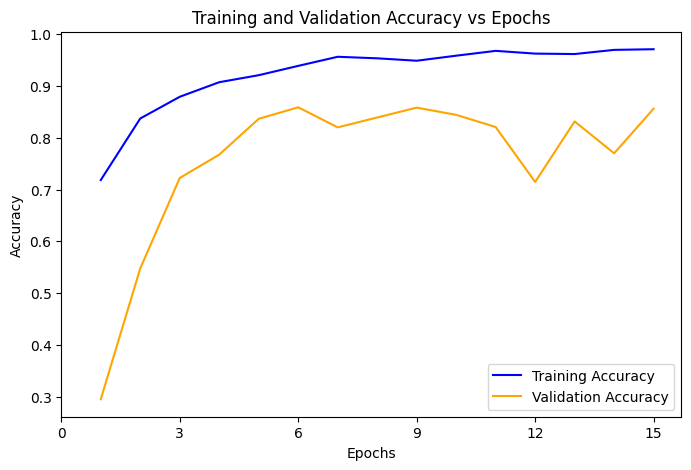

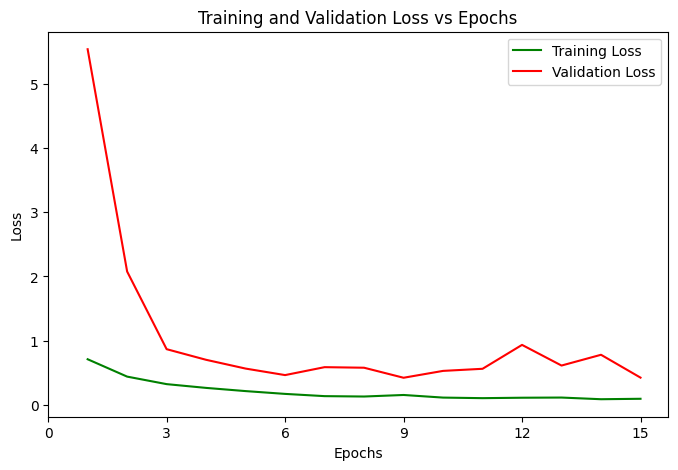

In [ ]:
# Plotting Training and Validation Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(epoch_list, train_accuracy_list, label='Training Accuracy', color='blue')
plt.plot(epoch_list, val_accuracy_list, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(0,16, 3))
plt.legend()
plt.show()

# Plotting Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epoch_list, train_loss_list, label='Training Loss', color='green')
plt.plot(epoch_list, val_loss_list, label='Validation Loss', color='red')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0,16, 3))
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate the model on the test set
model.eval()
true_labels = []
predicted_labels = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        # Store true and predicted labels for test set
        _, predicted = torch.max(outputs.data, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Compute test accuracy, precision, recall, and F1 score
test_accuracy = accuracy_score(true_labels, predicted_labels)
test_precision = precision_score(true_labels, predicted_labels, average='weighted')
test_recall = recall_score(true_labels, predicted_labels, average='weighted')
test_f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print test accuracy, precision, recall, and F1 score
print('Test Accuracy: %.4f, Precision: %.4f, Recall: %.4f, F1 Score: %.4f'
      % (test_accuracy, test_precision, test_recall, test_f1))

Test Accuracy: 0.8393, Precision: 0.8422, Recall: 0.8393, F1 Score: 0.8376


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
y_pred = []
y_true = []

# iterate over test data
#for inputs, labels in test_loader:
for i, (images, labels) in enumerate(test_loader):
    images, labels = images.to(device), labels.to(device)

    model = model.to(device)
    output = model(images) # Feed Network

    output = (torch.max(torch.exp(output), 1)[1])
    output = output.data.cpu().numpy()

    y_pred.extend(output) # Save Prediction

    labels1 = labels.data.cpu().numpy()
    y_true.extend(labels1) # Save Trut

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<Axes: >

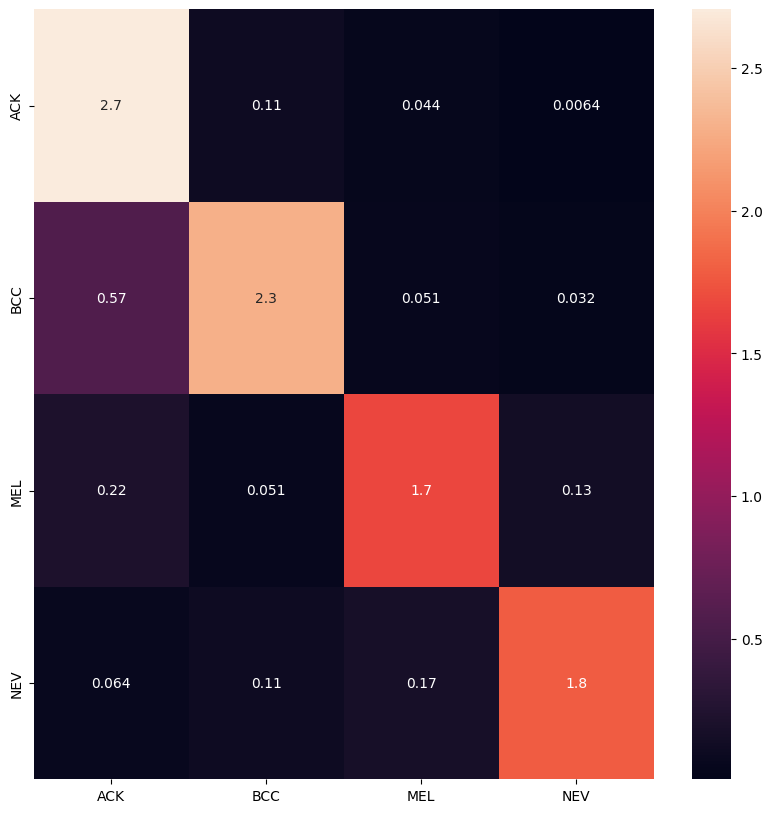

In [ ]:
import pandas as pd
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

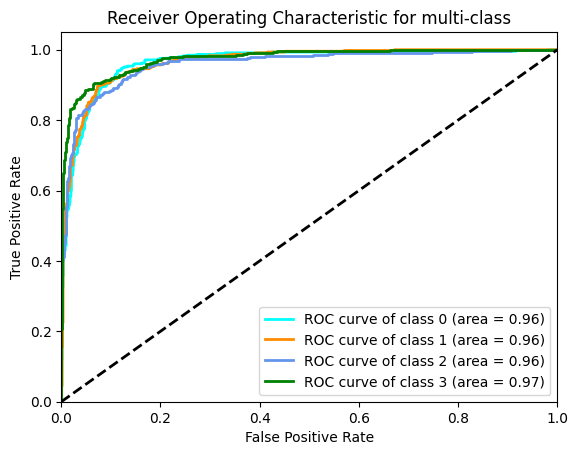

In [ ]:
import torch
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming 'model' is your neural network and 'test_loader' is your DataLoader for the test set.
# Also assuming 'num_classes' is the number of classes in your dataset.
num_classes=4

model.eval()  # Set the model to evaluation mode

# Collect all the labels and predictions for the test set
true_labels = []
pred_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)

        # Apply softmax to get probabilities
        probs = torch.nn.functional.softmax(outputs, dim=1)

        true_labels.append(labels.cpu().numpy())
        pred_probs.append(probs.cpu().numpy())

# Convert the true labels and predictions to a binary format
true_labels = label_binarize(np.concatenate(true_labels), classes=np.arange(num_classes))
pred_probs = np.concatenate(pred_probs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()

colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate the model on the test set
model.eval()
true_labels = []
predicted_labels = []
with torch.no_grad():
    for data in valid_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        # Store true and predicted labels for test set
        _, predicted = torch.max(outputs.data, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Compute test accuracy
test_accuracy = accuracy_score(true_labels, predicted_labels)

# Compute precision, recall, and F1 score for each class
test_precision = precision_score(true_labels, predicted_labels, average=None)
test_recall = recall_score(true_labels, predicted_labels, average=None)
test_f1 = f1_score(true_labels, predicted_labels, average=None)

# Print test accuracy
print('Test Accuracy: %.4f' % test_accuracy)

# Print precision, recall, and F1 score for each class
for i, (p, r, f) in enumerate(zip(test_precision, test_recall, test_f1)):
    print('Class %d - Precision: %.4f, Recall: %.4f, F1 Score: %.4f' % (i, p, r, f))

Test Accuracy: 0.8457
Class 0 - Precision: 0.7920, Recall: 0.9188, F1 Score: 0.8507
Class 1 - Precision: 0.8702, Recall: 0.8304, F1 Score: 0.8498
Class 2 - Precision: 0.8921, Recall: 0.7359, F1 Score: 0.8065
Class 3 - Precision: 0.8547, Recall: 0.8818, F1 Score: 0.8681


In [ ]:
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score

y_pred = []
y_true = []

# iterate over test data
for i, (images, labels) in enumerate(test_loader):
    images, labels = images.to(device), labels.to(device)

    model = model.to(device)
    output = model(images) # Feed Network

    output = (torch.max(torch.exp(output), 1)[1])
    output = output.data.cpu().numpy()

    y_pred.extend(output) # Save Prediction

    labels1 = labels.data.cpu().numpy()
    y_true.extend(labels1) # Save Truth

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_true, y_pred)
print('Matthews correlation coefficient (MCC):', mcc)

# Calculate Kappa score
kappa = cohen_kappa_score(y_true, y_pred)
print('Kappa score:', kappa)


Matthews correlation coefficient (MCC): 0.7848869220526183
Kappa score: 0.7828611560505161


In [ ]:
epoch_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
val_accuracy_list = [0.2947903430749682, 0.5476493011435832, 0.7223634053367217, 0.7674714104193139, 0.8367217280813215, 0.8589580686149937, 0.8202033036848793, 0.8392630241423126, 0.8583227445997459, 0.8443456162642948, 0.820838627700127, 0.7147395171537484, 0.8316391359593392, 0.770012706480305, 0.8563227445997459, 0.7859, 0.7764, 0.7948, 0.8005, 0.7922]
val_loss_list = [5.54435818195343, 2.0770792335271837, 0.86590591609478, 0.7000525981187821, 0.5632343995571136, 0.4616146984323859, 0.5852688689529896, 0.5765744695067405, 0.420118071436882, 0.5271637491881848, 0.5598886743187904, 0.9327444142103195, 0.6105233591794967, 0.7785101741552353, 0.422118071436882, 0.6849, 0.7886, 0.7137, 0.6724, 0.7061]
train_accuracy_list = [0.7183396865734858, 0.8373570520965693, 0.8792884371029225, 0.9074544684455739, 0.9210080474375265, 0.9390088945362135, 0.956586192291402, 0.9536213468869124, 0.9489623041084286, 0.9587039390088945, 0.968022024565862, 0.9627276577721304, 0.9618805590851334, 0.9699279966116052, 0.9711986446421008, 0.9655, 0.9710, 0.9655, 0.9740, 0.9693]
train_loss_list = [0.7088161582076872, 0.4378943138227269, 0.32063033779126565, 0.26185941127305096, 0.21197726936205416, 0.16834243491443024, 0.13335342946890238, 0.12742433430803185, 0.15149389603175223, 0.11072602006292122, 0.10187708561283511, 0.10860598006134702, 0.11130963732815675, 0.08527156699297798, 0.09215062424207006, 0.0987, 0.0869, 0.0978, 0.0795, 0.0835]


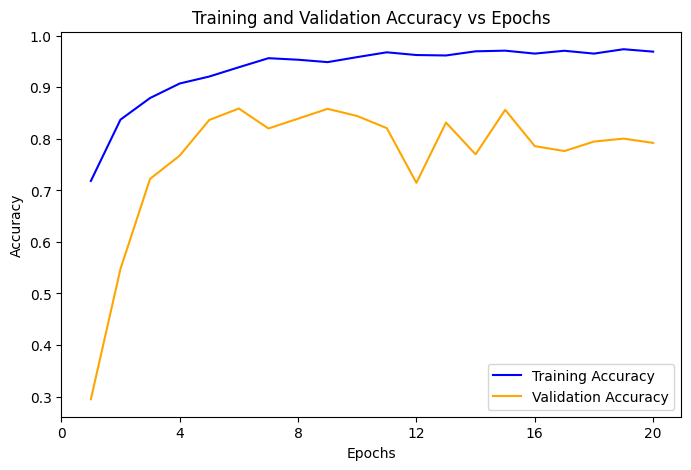

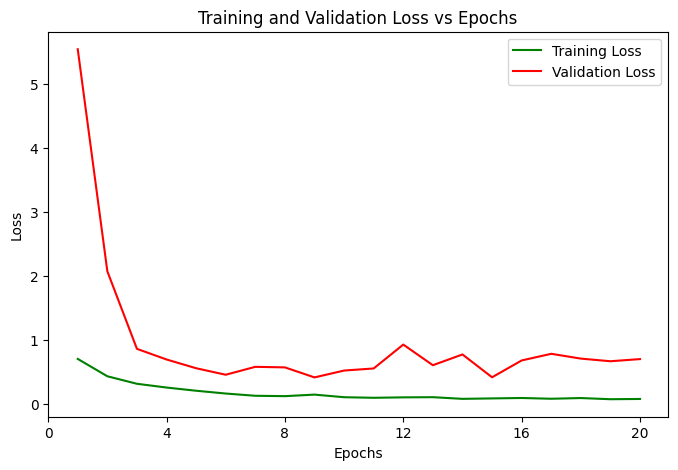

In [ ]:
# Plotting Training and Validation Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(epoch_list, train_accuracy_list, label='Training Accuracy', color='blue')
plt.plot(epoch_list, val_accuracy_list, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(0,21, 4))
plt.legend()
plt.show()

# Plotting Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epoch_list, train_loss_list, label='Training Loss', color='green')
plt.plot(epoch_list, val_loss_list, label='Validation Loss', color='red')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0,21, 4))
plt.legend()
plt.show()

In [ ]:
epoch_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
val_accuracy_list = [0.2947903430749682, 0.5476493011435832, 0.7223634053367217, 0.7674714104193139, 0.8367217280813215, 0.8589580686149937, 0.8202033036848793, 0.8392630241423126, 0.8583227445997459, 0.8443456162642948, 0.820838627700127, 0.7147395171537484, 0.8316391359593392, 0.770012706480305, 0.8563227445997459, 0.7859, 0.7764, 0.7948, 0.8005, 0.8393]
val_loss_list = [5.54435818195343, 2.0770792335271837, 0.86590591609478, 0.7000525981187821, 0.5632343995571136, 0.4616146984323859, 0.5852688689529896, 0.5765744695067405, 0.420118071436882, 0.5271637491881848, 0.5598886743187904, 0.9327444142103195, 0.6105233591794967, 0.7785101741552353, 0.422118071436882, 0.6849, 0.7886, 0.7137, 0.6724, 0.5080]
train_accuracy_list = [0.7183396865734858, 0.8373570520965693, 0.8792884371029225, 0.9074544684455739, 0.9210080474375265, 0.9390088945362135, 0.956586192291402, 0.9536213468869124, 0.9489623041084286, 0.9587039390088945, 0.968022024565862, 0.9627276577721304, 0.9618805590851334, 0.9699279966116052, 0.9711986446421008, 0.9655, 0.9710, 0.9655, 0.9740, 0.9763]
train_loss_list = [0.7088161582076872, 0.4378943138227269, 0.32063033779126565, 0.26185941127305096, 0.21197726936205416, 0.16834243491443024, 0.13335342946890238, 0.12742433430803185, 0.15149389603175223, 0.11072602006292122, 0.10187708561283511, 0.10860598006134702, 0.11130963732815675, 0.08527156699297798, 0.09215062424207006, 0.0987, 0.0869, 0.0978, 0.0795, 0.0741]


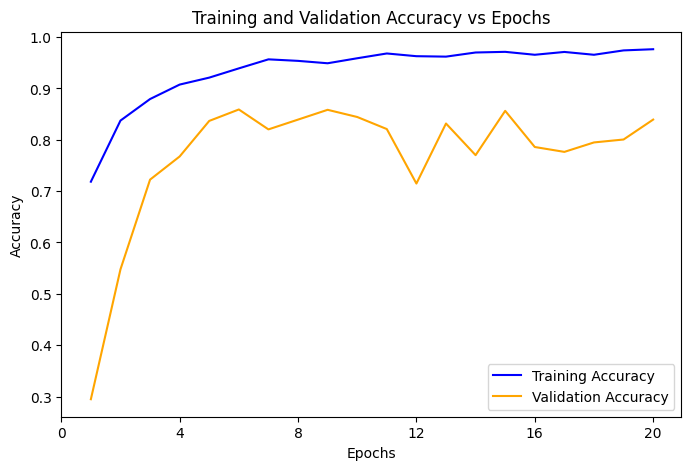

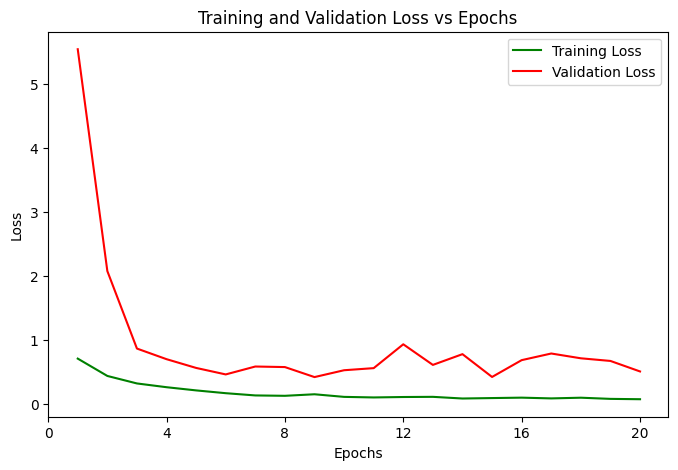

In [ ]:
# Plotting Training and Validation Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(epoch_list, train_accuracy_list, label='Training Accuracy', color='blue')
plt.plot(epoch_list, val_accuracy_list, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(0,21, 4))
plt.legend()
plt.show()

# Plotting Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epoch_list, train_loss_list, label='Training Loss', color='green')
plt.plot(epoch_list, val_loss_list, label='Validation Loss', color='red')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0,21, 4))
plt.legend()
plt.show()

In [ ]:
epoch_list = list(range(1, 51))

val_accuracy_list = [
    0.2947903430749682, 0.5476493011435832, 0.7223634053367217, 0.7674714104193139,
    0.8367217280813215, 0.8589580686149937, 0.8202033036848793, 0.8392630241423126,
    0.8583227445997459, 0.8443456162642948, 0.820838627700127, 0.7147395171537484,
    0.8316391359593392, 0.770012706480305, 0.8563227445997459, 0.7859, 0.7764,
    0.7948, 0.8005, 0.7922, 0.8717, 0.8316, 0.859, 0.8431, 0.8177, 0.7986,
    0.7757, 0.8234, 0.8513, 0.8348, 0.8189, 0.8418, 0.8596, 0.8024, 0.8151,
    0.8335, 0.8469, 0.803, 0.8412, 0.810, 0.8539, 0.8367, 0.7891, 0.8386,
    0.8272, 0.8488, 0.7046, 0.8456, 0.8189, 0.8113
]

val_loss_list = [
    5.54435818195343, 2.0770792335271837, 0.86590591609478, 0.7000525981187821,
    0.5632343995571136, 0.4616146984323859, 0.5852688689529896, 0.5765744695067405,
    0.420118071436882, 0.5271637491881848, 0.5598886743187904, 0.9327444142103195,
    0.6105233591794967, 0.7785101741552353, 0.422118071436882, 0.6849,0.4652,0.4860, 0.7886,
    0.7137, 0.6724, 0.7061, 0.3843, 0.616, 0.4744, 0.4227, 0.5975, 0.6724,
    0.7696, 0.5485, 0.4564, 0.5198, 0.6497, 0.486, 0.4652, 0.7713, 0.6968,
    0.5796, 0.5852, 0.7569, 0.5506, 0.7023, 0.5231, 0.6181, 0.731, 1.3729,
    0.5382, 0.689, 0.7394, 0.678
]

train_accuracy_list = [
    0.7183396865734858, 0.8373570520965693, 0.8792884371029225, 0.9074544684455739,
    0.9210080474375265, 0.9390088945362135, 0.956586192291402, 0.9536213468869124,
    0.9489623041084286, 0.9587039390088945, 0.968022024565862, 0.9627276577721304,
    0.9618805590851334, 0.9699279966116052, 0.9711986446421008, 0.9655, 0.971,
    0.9655, 0.974, 0.9693, 0.9665, 0.9693, 0.9629, 0.9689, 0.9822, 0.9627,
    0.9776, 0.9731, 0.9824, 0.9767, 0.9822, 0.975, 0.979,0.9767, 0.9786, 0.9784,
    0.9812, 0.9854, 0.978, 0.9826, 0.9814, 0.9858, 0.979, 0.9852, 0.9828,
    0.9826, 0.9877, 0.985, 0.9879, 0.9852
]

train_loss_list = [
    0.7088161582076872, 0.4378943138227269, 0.32063033779126565, 0.26185941127305096,
    0.21197726936205416, 0.16834243491443024, 0.13335342946890238, 0.12742433430803185,
    0.15149389603175223, 0.11072602006292122, 0.10187708561283511, 0.10860598006134702,
    0.11130963732815675, 0.08527156699297798, 0.09215062424207006, 0.0987, 0.0869,
    0.0978, 0.0795, 0.0835, 0.0905, 0.0934, 0.1024, 0.0831, 0.0551, 0.112,
    0.0671, 0.0736, 0.0584, 0.0698, 0.0518, 0.0758, 0.0603, 0.0638, 0.066,
    0.0641, 0.0522, 0.0467, 0.0662, 0.0451, 0.0552, 0.0415, 0.0648, 0.0441,
    0.0509, 0.0524, 0.0442, 0.042, 0.0341, 0.0436
]


In [ ]:
print(len(train_accuracy_list))
print(len(val_accuracy_list))
print(len(train_loss_list))
print(len(val_loss_list))

50
50
50
50


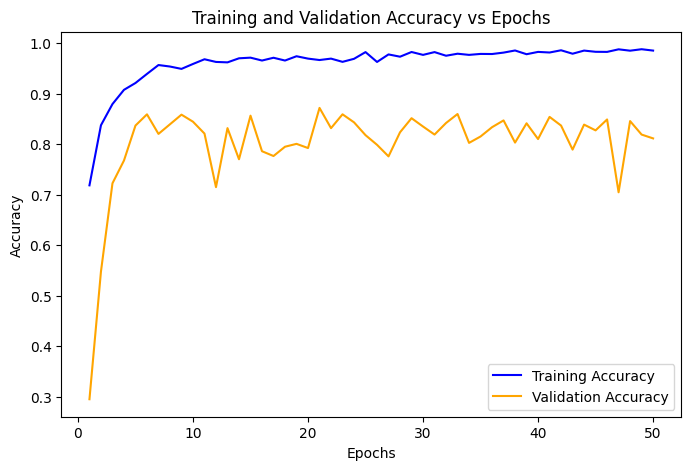

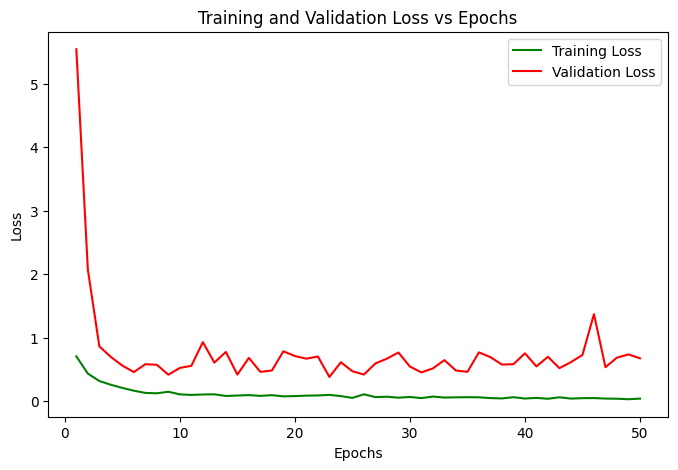

In [ ]:
# Plotting Training and Validation Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(epoch_list, train_accuracy_list, label='Training Accuracy', color='blue')
plt.plot(epoch_list, val_accuracy_list, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(0,51, 10))
plt.legend()
plt.show()

# Plotting Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epoch_list, train_loss_list, label='Training Loss', color='green')
plt.plot(epoch_list, val_loss_list, label='Validation Loss', color='red')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0,51, 10))
plt.legend()
plt.show()